# Logistic Regression 

Build a logistic regression classifier to recognize cats. 
This assignment will walk you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.
- Many software bugs in deep learning come from having matrix/vector dimensions that don't fit.

**The general architecture of this file:** 
1. Overview of the dataset: Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
2. Reshaping images: Reshape the datasets such that each example is a vector of size (num_px \* num_px \* 3, 1)
3. Normalize the data
4. Initializing parameters
5. Forward and Backward propagation
6. Gradient descent: Optimization loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)   
7. Prediction: Use the learned parameters to make predictions (on the test set) 
8. Merge all functions into a model
9. Further Analysis
10. Test with your own image

In [ ]:
# find your current directory
# import os
# curDir = os.getcwd()
# print(curDir)

In [ ]:
# change your current directory to where you store your files for week 2
# os.chdir("C:/Users/Behnaz/Dropbox/1. UCI/1.Courses/2.Deep Learning/Files/Data 1 - Logistic Regression")
# newDir = os.getcwd()
# print(newDir)

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
%cd 'gdrive/My Drive/DL/2 - Logistic Regression'

/content/gdrive/My Drive/DL/1 - Logistic Regression


In [3]:
# import
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

# 1) Overview of the dataset

**The dataset contains:**    
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)  
    - a test set of m_test images labeled as cat or non-cat  
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

In [4]:
# Loading the data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


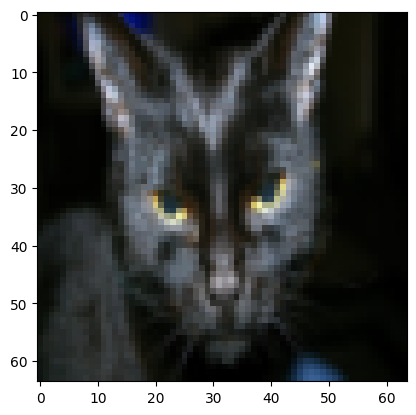

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
#Feel free also to change the index value and re-run to see other images.

**Question 1)** Find the values below.

In [ ]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [ ]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [ ]:
# Find the values below:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


# 2) Reshaping images

**Question 2)** Reshape the original training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [ ]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

# 3) Normalization

Standardize your dataset. 

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# 4) Initializing parameters


**Question 3)** Implement parameter initialization in the cell below.   
**Hint**: Use np.zeros() to initialize w as a vector of zeros. 

In [ ]:
# This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
# dim -- size of the w vector we want (or number of parameters in this case)
# This function returns:
# w -- initialized vector of shape (dim, 1)
# b -- initialized scalar (corresponds to the bias)

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
#example
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>


**Note**: For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

# 5) Forward and Backward propagation

**Question 4)** Implement a function propagate() that computes the cost function and its gradient.

**Reminders**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Forward Propagation: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [ ]:
# Helper function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
# Helper function
def L(yhat, y):
    loss = -(y*np.log(yhat)+(1-y)*np.log(1-yhat))
    return loss

In [ ]:
# Helper function
def C(yhat, y):
    m = y.shape[1]
    cost = 1/m*np.sum(L(yhat, y))
    return cost

In [ ]:
# w -- weights, a numpy array of size (num_px * num_px * 3, 1)
# b -- bias, a scalar
# X -- data of size (num_px * num_px * 3, number of examples)
# Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
# cost -- negative log-likelihood cost for logistic regression
# Dw -- gradient of the loss with respect to w, thus same shape as w
# Db -- gradient of the loss with respect to b, thus same shape as b
# the function returns the cost and gradients (Dw and Db)

def propagate(w, b, X, Y):

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                     
    cost = C(A, Y)
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    Dw = (1/m)*np.dot(X,(A-Y).T)
    Db = (1/m)*np.sum(A-Y)

    assert(Dw.shape == w.shape)
    assert(Db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return grads, cost

In [ ]:
# example
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("Dw = " + str(grads["Dw"]))
print ("Db = " + str(grads["Db"]))
print ("cost = " + str(cost))

Dw = [[0.99845601]
 [2.39507239]]
Db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** Dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** Db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

# 6) Gradient descent: Optimization loop

Now you need to put pieces together and update the parameters using gradient descent.  
    - Calculate loss for current parameters (forward propagation)  
    - Calculate gradient for current parameters (backward propagation)  
    - Update parameters using gradient descent   

**Question 5)** Implement a function optimize() to  to learn $w$ and $b$ by minimizing the cost function $J$.   
For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } D\theta$, where $\alpha$ is the learning rate.

In [ ]:
# This function optimizes w and b by running a gradient descent algorithm
# w -- weights, a numpy array of size (num_px * num_px * 3, 1)
# b -- bias, a scalar
# X -- data of size (num_px * num_px * 3, number of examples)
# Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

# num_iterations -- number of iterations of the optimization loop
# learning_rate -- learning rate of the gradient descent update rule
# print_cost -- True to print the loss every 100 steps

# this function returns:
# params -- dictionary containing the weights w and bias b
# grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
# costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.    


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        
        # Retrieve derivatives from grads
        Dw = grads["Dw"]
        Db = grads["Db"]
        
        # update rule 
        w = w - learning_rate * Dw
        b = b - learning_rate * Db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return params, grads, costs

In [ ]:
# example
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = optimize(w, b, X, Y, num_iterations= 500, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("Dw = " + str(grads["Dw"]))
print ("Db = " + str(grads["Db"]))

Cost after iteration 0: 5.801545
Cost after iteration 100: 1.055933
Cost after iteration 200: 0.378303
Cost after iteration 300: 0.363595
Cost after iteration 400: 0.356242
w = [[-0.35010423]
 [-0.49975908]]
b = 1.9716081506723147
Dw = [[ 0.06713807]
 [-0.01446052]]
Db = -0.05441432999899335


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr> 
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>
</table>

# 7) Prediction

The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X.  
There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Store the predictions in a vector `Y_prediction`, 0 (if A <= 0.5) or 1 (if A > 0.5).

Note: If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this. **Hint**: use np.where.). 

**Question 6)** Implement the predict() function.

In [ ]:
# Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
# w -- weights, a numpy array of size (num_px * num_px * 3, 1)
# b -- bias, a scalar
# X -- data of size (num_px * num_px * 3, number of examples)
# The function returns: Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
        
    for i in range(A.shape[1]):  
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0,i] = np.where(A[0,i]>0.5, 1, 0)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


# 8) Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.


**Question 7)** Implement the model function. Use the following notation:  
    - Y_prediction_test for your predictions on the test set  
    - Y_prediction_train for your predictions on the train set  
    - w, costs, grads for the outputs of optimize()  

In [ ]:
# This function builds the logistic regression model by calling the function you've implemented previously.
# X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
# Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
# X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
# Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
# num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
# learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
# print_cost -- Set to true to print the cost every 100 iterations

# This function returns d -- dictionary containing information about the model.

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Expected Output**: 

<table style="width:40%"> 
    <tr>
        <td> **Cost after iteration 0 **  </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 

**Notes**:  
    
- Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data.

- Test accuracy is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. We will build an even better classifiers!

Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

y = 1, you predicted that it is a "non-cat" picture.


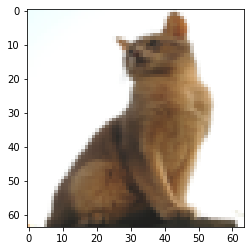

In [ ]:
# Example of a picture that was wrongly classified.
index = 6
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function.

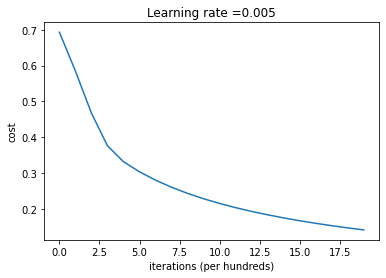

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Note**:  
    
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

# 9) Further analysis

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="Data 1 - Logistic Regression/images/sgd.gif" style="width:400;height:400;"> <img src="Data 1 - Logistic Regression/images/sgd_bad.gif" style="width:400;height:400;">

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



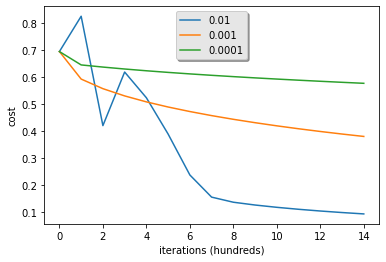

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. 


# 10) Test with your own image

You can use your own image and see the output of your model.

y = 0.0, your algorithm predicts a "non-cat" picture.


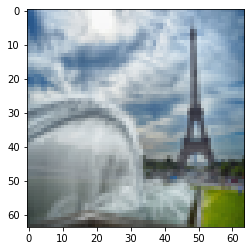

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "3 - my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
orig_im = Image.open(fname)
orig_array = np.asarray(orig_im)
#orig_array = orig_array/255.
resized_img = Image.fromarray(orig_array).resize(size=(num_px, num_px))
resized_array = np.asarray(resized_img)
unrolled_array = resized_array.reshape(num_px*num_px*3, 1)
my_predicted_image = predict(d["w"], d["b"], unrolled_array)

plt.imshow(resized_array)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
**What to remember from this file:**
    
1. Preprocessing the dataset is important.

2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model(). 
    
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!